In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style='whitegrid',color_codes=True)

DATA_DIR='c:/source/'
os.listdir(DATA_DIR)


['test.csv', 'train.csv']

In [4]:
DATA_DIR='c:/source/'
data_files=sorted([os.path.join(DATA_DIR,filename)for filename in os.listdir(DATA_DIR)],reverse=True)
data_files

['c:/source/train.csv', 'c:/source/test.csv']

In [5]:
df_list=[]
for filename in data_files:
    df_list.append(pd.read_csv(filename))
    
df=pd.concat(df_list,sort=False)

df=df.reset_index(drop=True)

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
number_of_train_dataset=df.Survived.notnull().sum()
number_of_test_dataset=df.Survived.isnull().sum()
y_true=df.pop('Survived')[:number_of_train_dataset]

In [7]:
y_true

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [8]:
#데이터 기초모양 확인
df.head(2).T

,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833
Cabin,NaN,C85


In [9]:
#결측치 비율 체크
pd.options.display.float_format='{:.2f}'.format

df.isnull().sum()/len(df)*100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           20.09
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [11]:
#결측치 삭제하거나 채우기
#성별 평균 확인
df[df['Age'].notnull()].groupby(["Sex"])["Age"].mean()

Sex
female   28.69
male     30.59
Name: Age, dtype: float64

In [14]:
#pclass별 성별 평균 구하기
df[df['Age'].notnull()].groupby(['Pclass'])['Age'].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [16]:
#Pclass 기준으로 age열 평균 구하기
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'),inplace=True)

df.isnull().sum()/len(df)*100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [17]:
df.loc[61,'Embarked']='S'
df.loc[829,'Embarked']='S'

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [19]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.82,0,0,A.5. 3236,8.05,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,24.82,0,0,359309,8.05,NaN,S


In [23]:
df['Embarked'].isnull().sum()

0

In [24]:
#원핫인코딩
def merge_and_get(ldf,rdf,on,how="inner",index=None):
    if index is True:
        return pd.merge(ldf,rdf,how=how,left_index=True,right_index=True)
    else:
        return pd.merge(ldf,rdf,how=how,on=on) 

In [25]:
one_hot_df=merge_and_get(df,pd.get_dummies(df['Sex'],prefix='Sex'),on=None,index=True)

one_hot_df=merge_and_get(one_hot_df,pd.get_dummies(df['Pclass'],prefix='Pclass'),on=None,index=True)

one_hot_df=merge_and_get(one_hot_df,pd.get_dummies(df['Embarked'],prefix='Embarked'),on=None,index=True)

In [26]:
one_hot_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1,0,1,0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1,0,1,0,0,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.82,0,0,A.5. 3236,8.05,NaN,S,0,1,0,0,1,0,0,1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C,1,0,1,0,0,1,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S,0,1,0,0,1,0,0,1
1307,1308,3,"Ware, Mr. Frederick",male,24.82,0,0,359309,8.05,NaN,S,0,1,0,0,1,0,0,1


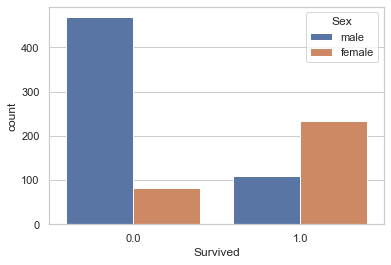

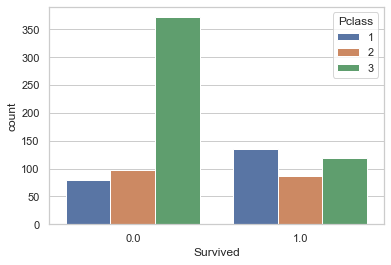

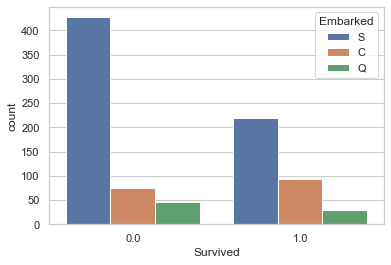

In [29]:
temp_columns=['Sex','Pclass','Embarked']

for col_name in temp_columns:
    temp_df=pd.merge(one_hot_df[col_name],y_true, left_index=True,right_index=True)
    sns.countplot(x='Survived',hue=col_name,data=temp_df)
    plt.show()